In [1]:
import numpy 
import matplotlib.pyplot as plt
from matplotlib.mlab import csv2rec
import matplotlib.cbook as cbook
from matplotlib.ticker import Formatter

In [2]:
# Define a class for formatting
class DateFormatter(Formatter):
    def __init__(self, dates, date_format='%Y-%m-%d'):
        self.dates = dates
        self.date_format = date_format
        
    # Extract the valut at time t at position 'position'
    def __call__(self, t, position=0):
        index = int(round(t))
        if index >= len(self.dates) or index < 0:
            return ''
        return self.dates[index].strftime(self.date_format)

In [3]:
# CSV file containeing the stock quotes
input_file = cbook.get_sample_data('aapl.csv', asfileobj=False)

# Load csv file into numpy record array
data = csv2rec(input_file)

In [4]:
# Create the date formatter object
formatter = DateFormatter(data.date)

In [5]:
# X axis
x_vals = numpy.arange(len(data))

# Y axis values are the closing stock quotes
y_vals = data.close

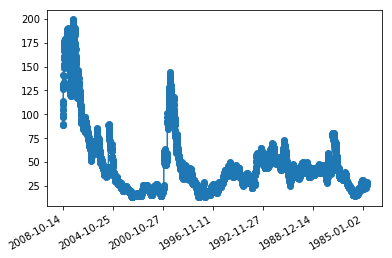

In [6]:
# Plot data
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.plot(x_vals, y_vals, 'o-')
fig.autofmt_xdate()
plt.show()

In [7]:
data

rec.array([ (datetime.date(2008, 10, 14),  116.26,  116.4 ,  103.14,  104.08, 70749800,  104.08),
 (datetime.date(2008, 10, 13),  104.55,  110.53,  101.02,  110.26, 54967000,  110.26),
 (datetime.date(2008, 10, 10),   85.7 ,  100.  ,   85.  ,   96.8 , 79260700,   96.8 ),
 ...,
 (datetime.date(1984, 9, 11),   26.62,   27.37,   26.62,   26.87,  5444000,    3.07),
 (datetime.date(1984, 9, 10),   26.5 ,   26.62,   25.87,   26.37,  2346400,    3.01),
 (datetime.date(1984, 9, 7),   26.5 ,   26.87,   26.25,   26.5 ,  2981600,    3.02)], 
          dtype=[('date', 'O'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('volume', '<i8'), ('adj_close', '<f8')])